Shahnaz Abdul Hameed


19/17018

Lagrangian Problem

In [2]:
#importing necessary packages
import sympy as sym
from sympy.physics.vector import init_vprinting
init_vprinting(pretty_print=True)        
from scipy.integrate import odeint                    #Solving ode with initial conditions
import numpy as np                                   
import matplotlib.pyplot as plt                       #Plot
get_ipython().run_line_magic('matplotlib', 'inline')
from ipywidgets import interactive                    #Sliders

In [3]:
m,g=sym.symbols("m,g",positive=True)
t=sym.symbols('t')
x=sym.Function('x')(t)
y=sym.Function('y')(t)

In [4]:
K=0.5*m*(x.diff(t)**2+y.diff(t)**2)                   #Kinetic energy
U=m*g*y                                               #Potential energy

In [5]:
L=K-U                                                 #Lagrangian

In [6]:
L
#print(L)

In [7]:
ELx=L.diff(x)-(L.diff(x.diff(t)).diff(t))            #Euler lagrange Equation wrt x
ELy=L.diff(y)-(L.diff(y.diff(t)).diff(t))            #Euler lagrange Equation wrt y

In [8]:
d2x=sym.solve(ELx,x.diff(t).diff(t))[0]
dx=x.diff(t)
print('d2x/dt2 =') 
d2x

d2x/dt2 =


In [9]:
d2y=sym.solve(ELy,y.diff(t).diff(t))[0]
dy=y.diff(t)
print('d2y/dt2 =') 
d2y

d2y/dt2 =


In [12]:
#making functions for ivp
def dYdt(Y,t):
    return [dy.subs(dy,Y[1]).evalf(), d2y.subs(g,9.81).evalf()]
def dXdt(X,t):
    return [dx.subs(dx,X[1]).evalf(), d2x.evalf()]               

In [13]:
def sol(xo,yo,ux,uy):
    
    t = np.linspace(0,2*uy/9.81,100)              #t=2uy/g
    xsol = odeint(dXdt, [xo, ux], t)
    ysol = odeint(dYdt, [yo, uy], t)
    print('range of projectile: ',xsol[99,0])
    print('max height attained by projectile: ',ysol[49,0])
    plt.figure(figsize=(10,8))
    plt.xlim(0,xsol[99,0])
    plt.ylim(0,ysol[49,0]+10)
    plt.plot(xsol[:,0],ysol[:,0],'--')
    plt.grid()
    plt.show()


range of projectile:  127.420998980632
max height attained by projectile:  31.851999540977335


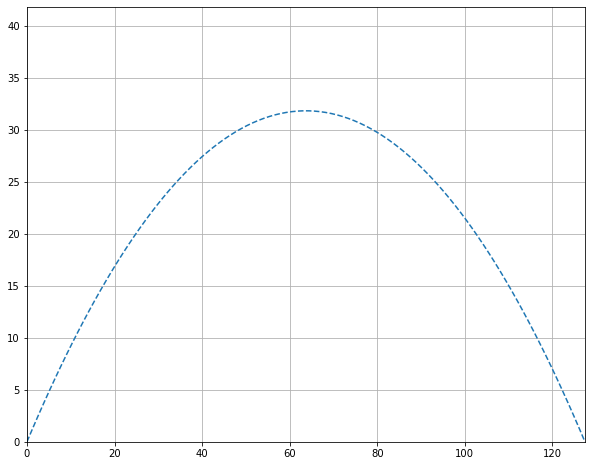

In [14]:
sol(0,0,25,25)

In [15]:
out=interactive(sol,xo=(-5,5,1),yo=(-5,5,1),ux=(0,50,1),uy=(0,50,1))

In [16]:
out

interactive(children=(IntSlider(value=0, description='xo', max=5, min=-5), IntSlider(value=0, description='yo'…